# Session 8 - Neural Networks

## Contents

- [Introduction](#Introduction)
- [PyTorch](#PyTorch)
- [Optimization and Gradient Descent](#Optimization-and-Gradient-Descent)
- [Advanced Topics](#Advanced-Topics)

In [1]:
# Import everything
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

import copy
import torch 
import torch.nn as nn
import torch.utils.data as Data
from torch.autograd import Variable
from sklearn.linear_model import LinearRegression
from torchviz import make_dot

In [2]:
# Import matplotlib for graphs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from IPython.display import clear_output

# Set global parameters
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

While `sklearn` has a library for neural networks, it is very basic and not the standard in the industry. The most commonly used libraries as of 2020 are **Tensorflow** and **Pytorch**.

TensorFlow is developed by Google Brain and actively used at Google both for research and production needs. Its closed-source predecessor is called DistBelief.

PyTorch is a cousin of lua-based Torch framework which was developed and used at Facebook. However, PyTorch is not a simple set of wrappers to support popular language, it was rewritten and tailored to be fast and feel native.

Here is an article that explains very well the difference between the two libraries: [pytorch-vs-tensorflow](https://towardsdatascience.com/pytorch-vs-tensorflow-spotting-the-difference-25c75777377b). In short, pytorch is much more intuitive for a python programmer and more user friendly. It also has a superior development and debugging experience. However, if you want more control on the fundamentals, a better community support and you need to train large models, Tensorflow is better.

## Introduction

The term neural network has evolved to encompass a large class of models and learning methods. Here I describe the most widely used “vanilla” neural net, sometimes called the single hidden layer back-propagation network, or single layer perceptron.

### Regression

Imagine a setting with two **inputs** available (let’s denote these inputs $i_1$ and $i_2$), and no special knowledge about the relationship between these inputs and the **output** that we want to predict (denoted by $o$) except that this relationship is, a priori, pretty complex and non-linear.

So we want to learn the function $f$ such that f($i_1$, $i_2$) is a good estimator of $o$. We could then suggest the following first model:

$$
o = w_{11} i_1 + w_{12} i_2
$$

where w11 and w12 are just weights/coefficients (do not take care about the indices for now). Before going any further, we should notice that, here, there is no constant term in the model. However, we could have introduced such term by setting $f(i_1, i_2) = w_{11} i_1 + w_{12} i_2 + c$. The constant is often called **bias**.

<img src="figures/nn1.jpeg" alt="Drawing" style="width: 600px;"/>

In this case, the model is easy to understand and to fit but has a big drawback : there is no non-linearity! This obviously do not respect our non-linear assumption. 

### Activation Functions

In order to introduce a non-linearity, let us make a little modification in the previous model and suggest the following one.

$$
o = a ( w_{11} i_1 + w_{12} i_2)
$$

where $a$ is a function called **activation function** which is non-linear.

<img src="figures/nn2.jpeg" alt="Drawing" style="width: 600px;"/>

### Layers

However, even if better than multilinear model, this model is still too simple and can’t handle the assumed underlying complexity of the relationship between inputs and output. We can make a step further and enrich the model the following way. 


1. First we could consider that the quantity $a ( w_{11} i_1 + w_{12} i_2)$ is no longer the final output but instead a new intermediate feature of our function, called $l_1$, which stands for **layer**. 

$$
l_1 = a ( w_{11} i_1 + w_{12} i_2)
$$

2. Second we could consider that we build several (3 in our example) such features in the same way, but possibly with different weights and different activation functions

$$
l_1 = a ( w_{11} i_1 + w_{12} i_2) \\
l_2 = a ( w_{21} i_1 + w_{22} i_2) \\
l_3 = a ( w_{31} i_1 + w_{32} i_2) 
$$

where the $a$’s are just activation functions and the $w$’s are weights. 
    
3. Finally, we can consider that our final output is build based on these intermediate features with the same “template”

$$
a_2 ( v_1 l_1 + v_2 l_2 + v_3 * l_3 )
$$

If we aggregate all the pieces, we then get our **prediction** $p$

$$
\begin{aligned}
p = f_{3}\left(i_{1}, i_{2}\right) &=a_{2}\left(v_{1} l_{1}+v_{2} l_{2}+v_{3} l_{3}\right) \\
&=a_{2}\left(v_{1} \times a_{11}\left(w_{11} i_{1}+w_{12} i_{2}\right)+v_{2} \times a_{12}\left(w_{21} i_{1}+w_{22} i_{2}\right)+v_{3} \times a_{13}\left(w_{31} i_{1}+w_{32} i_{2}\right)\right)
\end{aligned}
$$

where we should mainly keep in mind that $a$’s are non-linear activation functions and $w$’s and $v$’s are weights.

<img src="figures/nn3.jpeg" alt="Drawing" style="width: 900px;"/>


This last model is a basic feedforward neural network with:
 - 2 entries ($i_1$ and $i_2$)
 - 1 hidden layer with 3 hidden neurones (whose outputs are $l_1$, $l_2$ and $l_3$)
 - 1 final output ($p$)

## Pytorch

### Tensors

We can express the data as a `numpy` array.

In [3]:
x_np = np.arange(6).reshape((3, 2))
x_np

array([[0, 1],
       [2, 3],
       [4, 5]])

Or equivalently as a `pytorch` tensor.

In [4]:
x_tensor = torch.from_numpy(x_np)
x_tensor

tensor([[0, 1],
        [2, 3],
        [4, 5]])

We can also translate tensors back to arrays.

In [5]:
tensor2array = x_tensor.numpy()
tensor2array

array([[0, 1],
       [2, 3],
       [4, 5]])

We can make operations over this data. For example we can take the mean

In [6]:
try:
    torch.mean(x_tensor)
except Exception as e:
    print(e)

Can only calculate the mean of floating types. Got Long instead.


We first have to convert the data in float

In [7]:
x_tensor = torch.FloatTensor(x_np)
x_tensor

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]])

In [8]:
print(np.mean(x_np), '\n\n', torch.mean(x_tensor))

2.5 

 tensor(2.5000)


We can also apply compontent-wise functions

In [9]:
print(np.sin(x_np), '\n\n', torch.sin(x_tensor))

[[ 0.          0.84147098]
 [ 0.90929743  0.14112001]
 [-0.7568025  -0.95892427]] 

 tensor([[ 0.0000,  0.8415],
        [ 0.9093,  0.1411],
        [-0.7568, -0.9589]])


We can multiply tensors as we multiply matrices

In [10]:
print(np.matmul(x_np.T, x_np), '\n\n', torch.mm(x_tensor.T, x_tensor))

[[20 26]
 [26 35]] 

 tensor([[20., 26.],
        [26., 35.]])


But the element-wise multiplication does not work

In [11]:
try:
    x_tensor.dot(x_tensor)
except Exception as e:
    print(e)

1D tensors expected, but got 2D and 2D tensors


### Variables

Variable in torch is to build a computational graph, but this graph is dynamic compared with a static graph in Tensorflow or Theano. So torch does not have placeholder, torch can just pass variable to the computational graph.

In [12]:
# build a variable, usually for compute gradients
x_variable = Variable(x_tensor, requires_grad=True)   

x_variable

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]], requires_grad=True)

Until now the tensor and variable seem the same. However, the variable is a part of the graph, it's a part of the auto-gradient.

Suppose we are interested in: 

$$
z = \text{mean} (x_1^2) = \frac{1}{6} x^2
$$

In [13]:
z = torch.mean(x_variable*x_variable)
print(z)

tensor(9.1667, grad_fn=<MeanBackward0>)


We can compute the gradient by backpropagation

$$
\nabla z(x) = \frac{2}{3} x
$$

i.e. if we call the `backward` method on our outcome `z`, we see that the gradient of our variable `x` gets updated.

In [14]:
z.backward()
print(x_variable.grad)

tensor([[0.0000, 0.3333],
        [0.6667, 1.0000],
        [1.3333, 1.6667]])


However, its value has not changed.

In [15]:
print(x_variable)

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]], requires_grad=True)


We can also access the `tensor` part of the variable alone by calling the `data` method.

In [16]:
print(x_variable.data)

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]])


And we can convert the `tensor` tu `numpy`.

In [17]:
print(x_variable.data.numpy())

[[0. 1.]
 [2. 3.]
 [4. 5.]]


### Activation function

The main advantage of neural networks is that they introduce non-linearities among the layers. The standard non-linear function 

- ReLu
- Sigmoid
- TanH
- Softmax

In [18]:
# X grid
x_grid = torch.linspace(-5, 5, 200)  # x data (tensor), shape=(100, 1)
x_grid = Variable(x_grid)
x_grid_np = x_grid.data.numpy()   # numpy array for plotting

# Activation functions
y_relu = torch.relu(x_grid).data.numpy()
y_sigmoid = torch.sigmoid(x_grid).data.numpy()
y_tanh = torch.tanh(x_grid).data.numpy()
y_softmax = torch.softmax(x_grid, dim=0).data.numpy() 

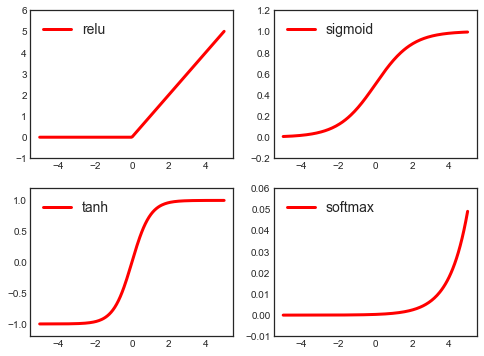

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,6))

# Relu
ax1.plot(x_grid_np, y_relu, c='red', label='relu')
ax1.set_ylim((-1, 6)); ax1.legend()

# Sigmoid
ax2.plot(x_grid_np, y_sigmoid, c='red', label='sigmoid')
ax2.set_ylim((-0.2, 1.2)); ax2.legend()

# Tanh
ax3.plot(x_grid_np, y_tanh, c='red', label='tanh')
ax3.set_ylim((-1.2, 1.2)); ax3.legend()

# Softmax
ax4.plot(x_grid_np, y_softmax, c='red', label='softmax')
ax4.set_ylim((-0.01, 0.06)); ax4.legend();

## Optimization and Gradient Descent

### Gradient Descent

Gradient descent works as follows:

0. Initialize the parameters
1. Compute the Loss
2. Compute the Gradients
3. Update the Parameters
4. Repeat (1)-(3) until convergence

### Gradient Descent in Linear Regression

In order to understand how are NN optimized, we start with a linear regression example. Remember that linear regression can be interpreted as the simplest possible NN.

We generate the following data:

$$
y = 1 + 2 x + \varepsilon
$$

with $x \sim N(0,1)$ and $\varepsilon \sim N(0,0.1)$

In [20]:
# Data Generation
np.random.seed(42)
x = np.sort(np.random.rand(100, 1), axis=0)
e = .1*np.random.randn(100, 1)
y_true = 1 + 2*x - 3*x**2
y = y_true + e

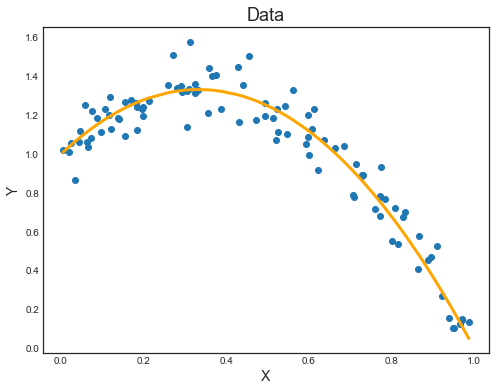

In [21]:
fig, ax = plt.subplots(figsize=(8,6))

# Scatter
ax.scatter(x,y); 
ax.plot(x,y_true,color='orange'); 
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_title("Data");

Gradient descent with linear regression.

1. Compute the Mean Squared Error
    $$
    \begin{array}
    \text{MSE} &= \frac{1}{N} \sum_{i=1}^{N}\left(y_{i}-\hat{y}_{i}\right)^{2} \\
          &= \frac{1}{N} \sum_{i=1}^{N}\left(y_{i}-a-b x_{i}\right)^{2}
    \end{array}
    $$
    
2. Compute its derivative
    $$
    \begin{array}{l}
    \frac{\partial M S E}{\partial a}=\frac{\partial M S E}{\partial \hat{y}_{i}} \cdot \frac{\partial \hat{y}_{i}}{\partial a}=\frac{1}{N} \sum_{i=1}^{N} 2\left(y_{i}-a-b x_{i}\right) \cdot(-1)=-2 \frac{1}{N} \sum_{i=1}^{N}\left(y_{i}-\hat{y}_{i}\right) \\
    \frac{\partial M S E}{\partial b}=\frac{\partial M S E}{\partial \hat{y}_{i}} \cdot \frac{\partial \hat{y}_{i}}{\partial b}=\frac{1}{N} \sum_{i=1}^{N} 2\left(y_{i}-a-b x_{i}\right) \cdot\left(-x_{i}\right)=-2 \frac{1}{N} \sum_{i=1}^{N} x_{i}\left(y_{i}-\hat{y}_{i}\right)
    \end{array}
    $$
    
3. Update the parameters 
    $$
        \begin{array}{l}
        a=a-\eta \frac{\partial M S E}{\partial a} \\
        b=b-\eta \frac{\partial M S E}{\partial b}
        \end{array}
    $$

In [22]:
# Plot gradient 
def gradient_plot(x, y, y_hat, y_true, n_epochs, losses):
    clear_output(wait=True)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
    
    # First figure
    ax1.clear()
    ax1.scatter(x, y)
    ax1.plot(x, y_true, 'orange')
    ax1.plot(x, y_hat, 'r-')
    ax1.set_title('Data and Fit')
    ax1.legend(['True', 'Predicted'])
    
    # Second figure
    ax2.clear()
    ax2.plot(range(len(losses)), losses, color='g')
    ax2.set_xlim(0,n_epochs); ax2.set_ylim(0,1.1*np.max(losses))
    ax2.set_title('True MSE = %.4f' % losses[-1])
    
    # Plot
    plt.show();

We start by taking a random guess of $\alpha$ and $\beta$.

In [23]:
# Initializes parameters "a" and "b" randomly
np.random.seed(42)
a = np.random.randn(1)
b = np.random.randn(1)

print(a, b)

[0.49671415] [-0.1382643]


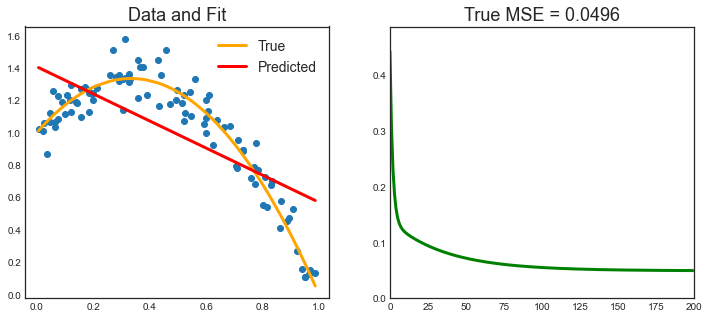

[1.40589939] [-0.83739496]


In [24]:
# Init
lr = 1e-1 # learning rate
n_epochs = 200 # number of epochs
losses = []

# Loop over epochs
for t in range(n_epochs):
    
    # Compute model prediction
    y_hat = a + b * x
    
    # Compute error
    error = (y - y_hat)
    
    # Compute loss (MSE)
    loss = ((y_true - y_hat)**2).mean()
    
    # Computesgradients for both "a" and "b" parameters
    a_grad = -2 * error.mean()
    b_grad = -2 * (x * error).mean()
    
    # Update parameters using gradients and the learning rate
    a = a - lr * a_grad
    b = b - lr * b_grad
    
    # Plot
    losses += [loss]
    if (t+1) % 10 == 0:
        gradient_plot(x, y, y_hat, y_true, n_epochs, losses)
    
print(a, b)

Sanity Check: do we get the same results as our gradient descent?

In [25]:
# OLS estimates
ols = LinearRegression()
ols.fit(x, y)
print(ols.intercept_, ols.coef_[0])

[1.4345303] [-0.89397853]


Amazing!

Now we are going to do exactly the same but with `pytorch`. First, we convert our data into tensors.

In [26]:
# Convert data to tensors
x_tensor = torch.from_numpy(x).float().to('cpu')
y_tensor = torch.from_numpy(y).float().to('cpu')
print(type(x), type(x_tensor))

<class 'numpy.ndarray'> <class 'torch.Tensor'>


In [27]:
# FIRST
# Initializes parameters "a" and "b" randomly, ALMOST as we did in Numpy
# since we want to apply gradient descent on these parameters, we need
# to set REQUIRES_GRAD = TRUE
a = torch.randn(1, requires_grad=True, dtype=torch.float)
b = torch.randn(1, requires_grad=True, dtype=torch.float)
print(a, b)

# SECOND
# But what if we want to run it on a GPU? We could just send them to device, right?
a = torch.randn(1, requires_grad=True, dtype=torch.float).to('cpu')
b = torch.randn(1, requires_grad=True, dtype=torch.float).to('cpu')
print(a, b)
# Sorry, but NO! The to(device) "shadows" the gradient...

# THIRD
# We can either create regular tensors and send them to the device (as we did with our data)
a = torch.randn(1, dtype=torch.float).to('cpu')
b = torch.randn(1, dtype=torch.float).to('cpu')
# and THEN set them as requiring gradients...
a.requires_grad_()
b.requires_grad_()
print(a, b)

tensor([-0.2960], requires_grad=True) tensor([-0.1881], requires_grad=True)
tensor([-0.9136], requires_grad=True) tensor([0.2149], requires_grad=True)
tensor([-1.4186], requires_grad=True) tensor([-1.1249], requires_grad=True)


### Autograd

Autograd is PyTorch’s automatic differentiation package. Thanks to it, we don’t need to worry about partial derivatives, chain rule or anything like it.

So, how do we tell PyTorch to do its thing and compute all gradients? That’s what backward() is good for.
§
Do you remember the starting point for computing the gradients? It was the loss, as we computed its partial derivatives w.r.t. our parameters. Hence, we need to invoke the backward() method from the corresponding Python variable, like, loss.backward().

What about the actual values of the gradients? We can inspect them by looking at the grad attribute of a tensor.

If you check the method’s documentation, it clearly states that gradients are accumulated. So, every time we use the
gradients to update the parameters, we need to zero the gradients afterwards. And that’s what zero_() is good for.

What does the underscore (_) at the end of the method name mean? Do you remember? If not, scroll back to the previous section and find out.

So, let’s ditch the manual computation of gradients and use both backward() and zero_() methods instead.

That’s it? Well, pretty much… but, there is always a catch, and this time it has to do with the update of the parameters…

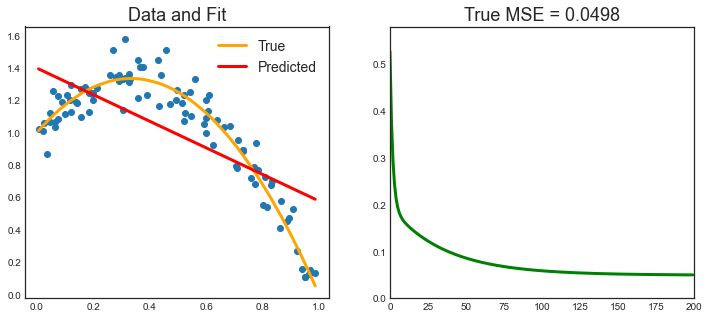

tensor([1.3978], requires_grad=True) tensor([-0.8214], requires_grad=True)


In [28]:
# Init
lr = 1e-1
n_epochs = 200
losses = []

# Init guess
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device='cpu')
b = torch.randn(1, requires_grad=True, dtype=torch.float, device='cpu')

# Loop over epochs
for t in range(n_epochs):
    y_hat = a + b * x_tensor
    error = y_tensor - y_hat
    loss = (error ** 2).mean()

    # No more manual computation of gradients! 
    # a_grad = -2 * error.mean()
    # b_grad = -2 * (x_tensor * error).mean()
    
    # We just tell PyTorch to work its way BACKWARDS from the specified loss!
    loss.backward()
    
    # Let's check the computed gradients...
    g = [a.grad.numpy(), b.grad.numpy()]
    
    # What about UPDATING the parameters? Not so fast...
    
    # FIRST ATTEMPT
    # AttributeError: 'NoneType' object has no attribute 'zero_'
    # a = a - lr * a.grad
    # b = b - lr * b.grad
    # print(a)

    # SECOND ATTEMPT
    # RuntimeError: a leaf Variable that requires grad has been used in an in-place operation.
    # a -= lr * a.grad
    # b -= lr * b.grad        
    
    # THIRD ATTEMPT
    # We need to use NO_GRAD to keep the update out of the gradient computation
    # Why is that? It boils down to the DYNAMIC GRAPH that PyTorch uses...
    with torch.no_grad():
        a -= lr * a.grad
        b -= lr * b.grad
    
    # PyTorch is "clingy" to its computed gradients, we need to tell it to let it go...
    a.grad.zero_()
    b.grad.zero_()
    
    # Plot
    losses += [((y_true - y_hat.detach().numpy())**2).mean()]
    if (t+1) % 10 == 0:
        gradient_plot(x, y, y_hat.data.numpy(), y_true, n_epochs, losses)
    
print(a, b)

### Optimizer


So far, we’ve been manually updating the parameters using the computed gradients. That’s probably fine for two parameters… but what if we had a whole lot of them?! We use one of PyTorch’s optimizers, like SGD or Adam.

An optimizer takes the parameters we want to update, the learning rate we want to use (and possibly many other hyper-parameters as well!) and performs the updates through its step() method.

Besides, we also don’t need to zero the gradients one by one anymore. We just invoke the optimizer’s zero_grad() method and that’s it!

In the code below, we create a Stochastic Gradient Descent (SGD) optimizer to update our parameters a and b.

In [29]:
# Init parameters
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device='cpu')
b = torch.randn(1, requires_grad=True, dtype=torch.float, device='cpu')
print(a, b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


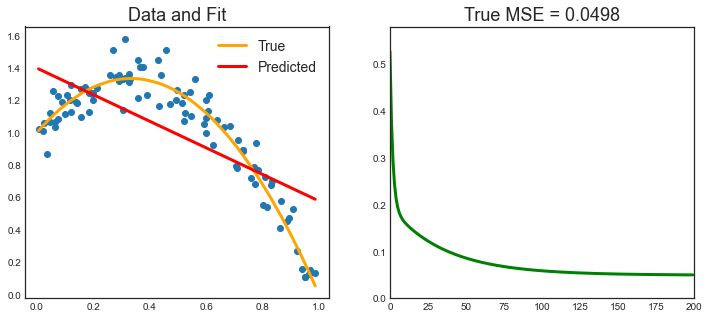

tensor([1.3978], requires_grad=True) tensor([-0.8214], requires_grad=True)


In [30]:
# Init 
lr = 1e-1
n_epochs = 200
losses = []

# Defines a SGD optimizer to update the parameters
optimizer = torch.optim.SGD([a, b], lr=lr)

for t in range(n_epochs):
    y_hat = a + b * x_tensor
    error = y_tensor - y_hat
    loss = (error ** 2).mean()    
    loss.backward()    
    
    # No more manual update!
    # with torch.no_grad():
    #     a -= lr * a.grad
    #     b -= lr * b.grad
    optimizer.step()
    
    # No more telling PyTorch to let gradients go!
    # a.grad.zero_()
    # b.grad.zero_()
    optimizer.zero_grad()
    
    # Plot
    losses += [((y_true - y_hat.detach().numpy())**2).mean()]
    if (t+1) % 10 == 0:
        gradient_plot(x, y, y_hat.data.numpy(), y_true, n_epochs, losses)
    
print(a, b)

In our model, we manually created two parameters to perform a linear regression. Let’s use PyTorch’s Linear model as an attribute of our own, thus creating a nested model.

Even though this clearly is a contrived example, as we are pretty much wrapping the underlying model without adding anything useful (or, at all!) to it, it illustrates well the concept.

In the __init__ method, we created an attribute that contains our nested Linear model.

In the forward() method, we call the nested model itself to perform the forward pass (notice, we are not calling self.linear.forward(x)!).

In [31]:
class LinearNet(nn.Module):
    def __init__(self):
        super().__init__()
        # Instead of our custom parameters, we use a Linear layer with single input and single output
        self.linear = nn.Linear(1, 1)
                
    def forward(self, x):
        # Now it only takes a call to the layer to make predictions
        return self.linear(x)

Now, if we call the parameters() method of this model, PyTorch will figure the parameters of its attributes in a recursive way. 

In [32]:
[*LinearNet().parameters()]

[Parameter containing:
 tensor([[-0.2191]], requires_grad=True),
 Parameter containing:
 tensor([0.2018], requires_grad=True)]

In [33]:
def train_NN(x, y, y_true, net, optimizer, loss_func, n_epochs):
    
    # Init
    x_tensor = torch.from_numpy(x).float().to('cpu')
    y_tensor = torch.from_numpy(y).float().to('cpu')
    losses = []

    # Iterate over epochs
    for t in range(n_epochs):

        # input x and predict based on x
        y_hat = net(x_tensor)     

        # compute loss
        loss = loss_func(y_hat, y_tensor)    
        losses += [loss.detach().numpy()]

        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients

        # Plot
        losses += [((y_true - y_hat.detach().numpy())**2).mean()]
        if (t+1) % (n_epochs/25) == 0:
            gradient_plot(x, y, y_hat.data.numpy(), y_true, n_epochs, losses)

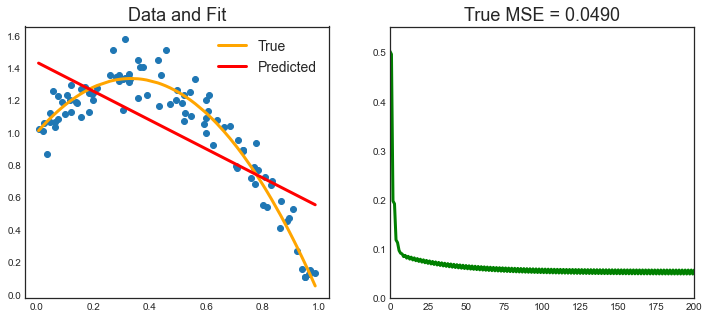

In [34]:
# Define network, optimizer and loss function
net1 = LinearNet()
optimizer = torch.optim.SGD(net1.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()
n_epochs = 200

# Train
train_NN(x, y, y_true, net1, optimizer, loss_func, n_epochs)

We now define a more complicated NN.

In [35]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = torch.relu(self.hidden(x))  # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [36]:
# ReluNet
net2 = Net(n_feature=1, n_hidden=10, n_output=1)
print(net2)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


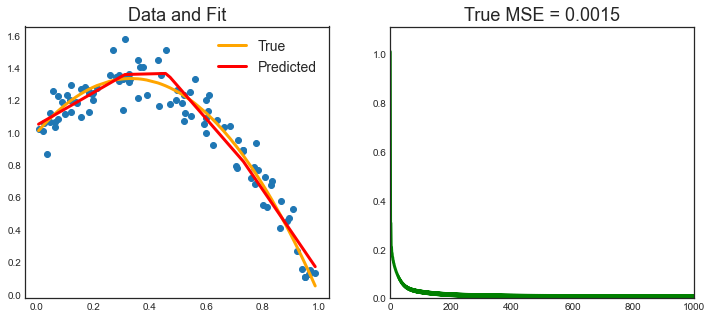

In [37]:
# Define network, optimizer and loss function
optimizer = torch.optim.SGD(net2.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss
n_epochs = 1000

# Train
train_NN(x, y, y_true, net2, optimizer, loss_func, n_epochs)

We can use more complicated networks

In [38]:
# Generate network
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = torch.tanh(self.hidden(x))      # activation function for hidden layer
        y_hat = self.predict(x)         # linear output
        return y_hat

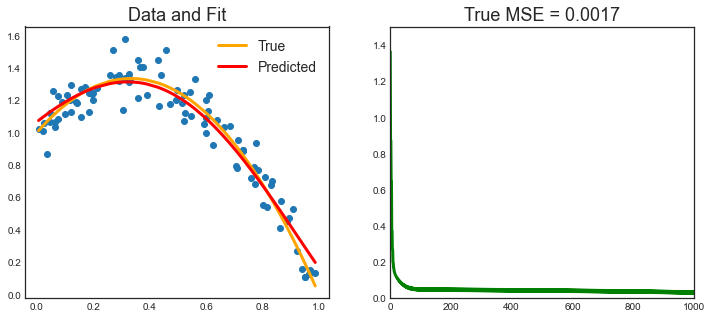

In [39]:
# Define network, optimizer and loss function
net3 = Net(n_feature=1, n_hidden=10, n_output=1)
optimizer = torch.optim.SGD(net3.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss
n_epochs = 1000

# Train
train_NN(x, y, y_true, net3, optimizer, loss_func, n_epochs)

### An easier way

The is an easier and faster way to build neural networks.

In [40]:
# Easy and fast way to build your network
net4 = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)

print(net4)

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)


### Loss functions

So far we have used the Stochastic  as loss function.

Notice that `nn.MSELoss` actually creates a loss function for us — it is NOT the loss function itself. Moreover, you can specify a reduction method to be applied, that is, how do you want to aggregate the results for individual points — you can average them (reduction=`mean`) or simply sum them up (reduction=`sum`).

We are now going to use different ones.

In [41]:
# parameters
LR = 0.1
EPOCHS = 25

# nets
n = torch.nn.Sequential(torch.nn.Linear(1, 10), torch.nn.ReLU(), torch.nn.Linear(10, 1))
nets = [n,n,n,n]

# optimizers
optimizers = [torch.optim.SGD(n.parameters(), lr=LR) for n in nets]

# different loss functions
loss_MSE        = torch.nn.MSELoss()
loss_L1         = torch.nn.L1Loss()
loss_NLL        = torch.nn.NLLLoss()
loss_KLD        = torch.nn.KLDivLoss()
loss_funcs = [loss_MSE, loss_L1, loss_NLL, loss_KLD]

This is the description of the loss functions:

 - `MSELoss`: Creates a criterion that measures the mean squared error (squared L2 norm) between each element in the input $x$ and target $y$.
 
 - `L1Loss`: Creates a criterion that measures the mean absolute error (MAE) between each element in the input $x$ and target $y$.
 
 - `NLLLoss`: The negative log likelihood loss.
 
 - `KLDivLoss`: The Kullback-Leibler divergence loss measure

In [42]:
# Train multiple nets
def train_nets(x, y, y_true, nets, optimizers, loss_funcs, labels, EPOCHS):

    # Put dateset into torch dataset
    x_tensor = torch.from_numpy(x).float().to('cpu')
    y_tensor = torch.from_numpy(y).float().to('cpu')
    torch_dataset = Data.TensorDataset(x_tensor, y_tensor)
    
    # Init
    losses = np.zeros((0,4))
    
    # Train
    for epoch in range(EPOCHS): # for each epoch
        losses = np.vstack((losses, np.zeros((1,4))))
        for k, net, opt, lf in zip(range(4), nets, optimizers, loss_funcs):
            y_hat = net(x_tensor)              # get output for every net
            loss = loss_func(y_hat, y_tensor)  # compute loss for every net
            opt.zero_grad()                    # clear gradients for next train
            loss.backward()                    # backpropagation, compute gradients
            opt.step()                         # apply gradients
            losses[-1,k] = ((y_true - y_hat.detach().numpy())**2).mean()
        plot_losses(losses, labels, EPOCHS)

In [43]:
# Plot losses 
def plot_losses(losses, labels, EPOCHS):
    clear_output(wait=True)
    fig, ax = plt.subplots(1,1, figsize=(10,6))
    
    # Plot
    ax.clear()
    ax.plot(range(len(losses)), losses)
    ax.set_xlim(0,EPOCHS-1); ax.set_ylim(0,1.1*np.max(losses))
    ax.set_title('Compare Losses'); ax.set_ylabel('True MSE')
    legend_txt = ['%s=%.4f' % (label, loss) for label,loss in zip(labels, losses[-1,:])]
    ax.legend(legend_txt)
    
    # Shot
    plt.show();

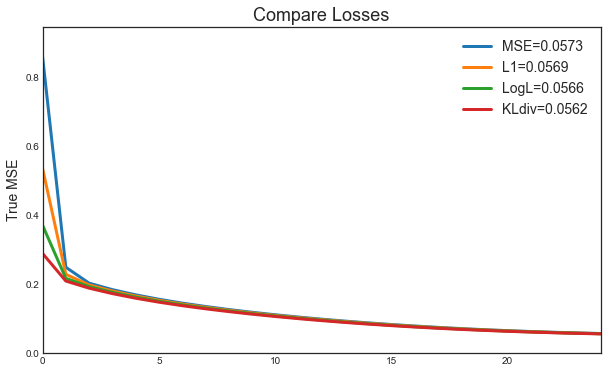

In [44]:
# Train
labels = ['MSE', 'L1', 'LogL', 'KLdiv']
train_nets(x, y, y_true, nets, optimizers, loss_funcs, labels, EPOCHS)

In this very simple case, all loss functions are very similar.

### Optimizers

So far we have used the Stochastic Gradient Descent to fit the neural network. We are now going to use different ones.

In [45]:
# parameters
LR = 0.1
EPOCHS = 25

# nets
n = torch.nn.Sequential(torch.nn.Linear(1, 10), torch.nn.ReLU(), torch.nn.Linear(10, 1))
nets = [n,n,n,n]

# different optimizers
opt_SGD         = torch.optim.SGD(nets[0].parameters(), lr=LR)
opt_Momentum    = torch.optim.SGD(nets[1].parameters(), lr=LR, momentum=0.8)
opt_RMSprop     = torch.optim.RMSprop(nets[2].parameters(), lr=LR, alpha=0.9)
opt_Adam        = torch.optim.Adam(nets[3].parameters(), lr=LR, betas=(0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

# loss functions
l = torch.nn.MSELoss()
loss_funcs = [l,l,l,l]

This is the [description of the optimizers](https://pytorch.org/docs/stable/optim.html):

 - `SGD`: Implements stochastic gradient descent (optionally with momentum).

 - `Momentum`: Nesterov momentum is based on the formula from [On the importance of initialization and momentum in deep learning](http://www.cs.toronto.edu/~hinton/absps/momentum.pdf).

 - `RMSprop`: Proposed by G. Hinton in his [course](https://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf). The centered version first appears in [Generating Sequences With Recurrent Neural Networks](https://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf). The implementation here takes the square root of the gradient average before adding epsilon (note that TensorFlow interchanges these two operations). The effective learning rate is thus $\frac{\alpha}{\sqrt{v} + \epsilon}$ where $\alpha$ is the scheduled learning rate and $v$ is the weighted moving average of the squared gradient.

 - `Adam`: Proposed in [Adam: A Method for Stochastic Optimization](https://arxiv.org/abs/1412.6980). The implementation of the L2 penalty follows changes proposed in [Decoupled Weight Decay Regularization](https://arxiv.org/abs/1711.05101).
 

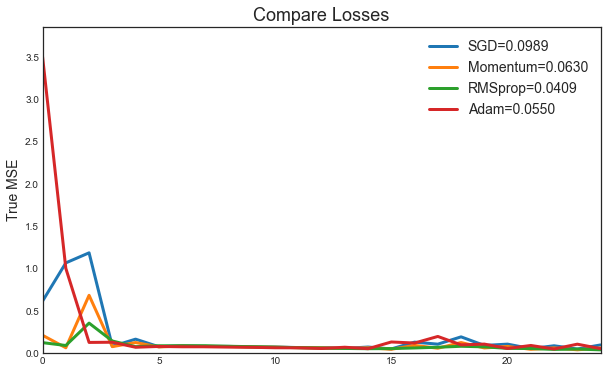

In [47]:
# train
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
train_nets(x, y, y_true, nets, optimizers, loss_funcs, labels, EPOCHS)

### Training on batch

Until now, we have used the whole training data at every training step. It has been batch gradient descent all along. 

This is fine for our ridiculously small dataset, sure, but if we want to go serious about all this, we must use mini-batch gradient descent. Thus, we need mini-batches. Thus, we need to slice our dataset accordingly. Do you want to do it manually?! Me neither!

So we use PyTorch’s `DataLoader` class for this job. We tell it which dataset to use (the one we just built in the previous section), the desired mini-batch size and if we’d like to shuffle it or not. That’s it!

Our loader will behave like an iterator, so we can loop over it and fetch a different mini-batch every time.

In [48]:
# Init data
x_tensor = torch.from_numpy(x).float().to('cpu')
y_tensor = torch.from_numpy(y).float().to('cpu')
torch_dataset = Data.TensorDataset(x_tensor, y_tensor)

# Build DataLoader
BATCH_SIZE = 25
loader = Data.DataLoader(
    dataset=torch_dataset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # random shuffle for training
)

In this case we are using sub-samples of dimension `BATCH_SIZE = 25`.

In [53]:
def train_NN_batch(loader, y_true, net, optimizer, loss_func, n_epochs):
    
    # Init
    losses = []

    # Iterate over epochs
    for t in range(n_epochs):   # train entire dataset 3 times
        for step, (batch_x, batch_y) in enumerate(loader):

            # Compute loss
            y_hat = net(batch_x)     

            # compute loss
            loss = loss_func(y_hat, batch_y)    

            optimizer.zero_grad()   # clear gradients for next train
            loss.backward()         # backpropagation, compute gradients
            optimizer.step()        # apply gradients

        # Plot every epoch
        y_hat = net(x_tensor)  
        loss = loss_func(y_hat, y_tensor)    
        losses += [loss.detach().numpy()]
        if (t+1) % (n_epochs/25) == 0:
            gradient_plot(x, y, y_hat.data.numpy(), y_true, n_epochs, losses)

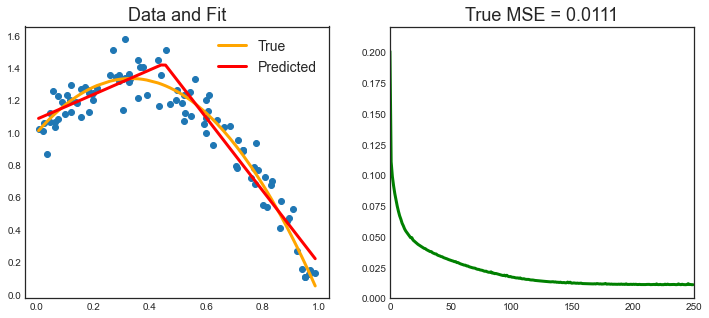

In [55]:
# parameters
LR = 0.1
EPOCHS = 250
net = torch.nn.Sequential(torch.nn.Linear(1, 10), torch.nn.ReLU(), torch.nn.Linear(10, 1))
optimizer = torch.optim.SGD(net.parameters(), lr=LR)
loss_func = torch.nn.MSELoss()

# Train
train_NN_batch(loader, y_true, net, optimizer, loss_func, EPOCHS)

Two things are different now: not only we have an inner loop to load each and every mini-batch from our DataLoader but, more importantly, we are now sending only one mini-batch to the device.

For bigger datasets, loading data sample by sample (into a CPU tensor) using Dataset’s `__get_item__` and then sending all samples that belong to the same mini-batch at once to your GPU (device) is the way to go in order to make the best use of your graphics card’s RAM.

Moreover, if you have many GPUs to train your model on, it is best to keep your dataset “agnostic” and assign the batches to different GPUs during training.

## Advanced Topics

### Issues

#### Starting Values

Usually starting values for weights are chosen to be random values near zero. Hence the model starts out nearly linear, and becomes nonlinear as the weights increase.

#### Overfitting

In early developments of neural networks, either by design or by accident, an early stopping rule was used to avoid overfitting. 

A more explicit method for regularization is *weight decay*.

#### Scaling of the Inputs

Since the scaling of the inputs determines the effective scaling of the weights in the bottom layer, it can have a large effect on the quality of the final solution. At the outset it is best to standardize all inputs to have mean zero and standard deviation one. 

#### Number of Hidden Units and Layers

Generally speaking it is better to have too many hidden units than too few. With too few hidden units, the model might not have enough flexibility to capture the nonlinearities in the data; with too many hidden units, the extra weights can be shrunk toward zero if appropriate regularization is used. 

Choice of the number of hidden layers is guided by background knowledge and experimentation. Each layer extracts features of the input for regression or classification. Use of multiple hidden layers allows construction of hierarchical features at different levels of resolution.

You can get an intuition on the role of hidden layers here: https://playground.tensorflow.org/

#### Multiple Minima

The error function R(θ) is nonconvex, possessing many local minima. One approach is to use the average predictions over the collection of networks as the final prediction. Another approach is via *bagging*.

### Deep Neural Networks and Deep Learning

Deep Neural Networks are just Neural Networks with more than one hidden layer.

### Convolutional Neural Nets

Convolutional Neural Nets are often applied when dealing with image/video data. They are usually coded with each feature being a pixel and its value is the pixel color (3 dimensional RGB array).

<img src="figures/cnn1.png" style="width: 400px;"/>

Videos and images have 2 main characteristics:
 - have lots of features
 - "close" features are often similar
 
Convolutional Neural Nets exploit the second characteristic to alleviate the computational problems arising from the first. They do it by constructing a first layer that does not build on evey feature but only on adjacent ones.

<img src="figures/cnn1.gif" style="width: 400px;"/>

In this way, most of the information is preserved, on a lower dimensional representation.

### Recursive Neural Nets

Recursive neural networks are ne

### Recurrent Neural Nets

Recurrent Neural Networks are often applied in contexts in which the data generating process is dynamic. The most important example is Natural Language Processing. The idea is that you want to make predictions "live" as data comes in. Moreover, the order of the data is relevant, so that you also what to keep track of what the model has learned so far.

While RNNs learn similarly while training, in addition, they remember things learnt from prior input(s) while generating output(s). It’s part of the network. RNNs can take one or more input vectors and produce one or more output vectors and the output(s) are influenced not just by weights applied on inputs like a regular NN, but also by a “hidden” state vector representing the context based on prior input(s)/output(s). So, the same input could produce a different output depending on previous inputs in the series.
 
<img src="figures/rnn1.png" style="width: 600px;"/>

In summary, in a vanilla neural network, a fixed size input vector is transformed into a fixed size output vector. Such a network becomes “recurrent” when you repeatedly apply the transformations to a series of given input and produce a series of output vectors.

### Use in Artificial Intelligence

## Next Session

Jump to [Session 9 - Post-double Selection](https://nbviewer.jupyter.org/github/matteocourthoud/Machine-Learning-for-Economic-Analysis-2020/blob/master/8_postdoubleselection.ipynb)